In [0]:
pip install tensorflow-hub

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation
from tensorflow.python.framework import ops
ops.reset_default_graph()
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.datasets import cifar10
from keras.layers import Dense
import tensorflow_hub as hub
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import math
from keras_preprocessing.image import ImageDataGenerator


In [0]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

array([7], dtype=uint8)

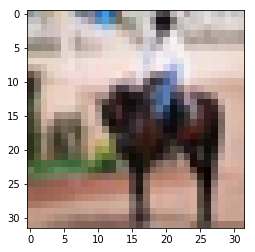

In [0]:
single_img = np.array(x_train[11])

single_img_reshaped = single_img.reshape(32,32,3)

plt.imshow(single_img_reshaped)
y_train[11]

In [0]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
from keras.utils import to_categorical

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
print(y_train.shape,y_test.shape)

(50000, 10) (10000, 10)


In [0]:
num_classes=10
epochs=50
batch_size=128

img_height,img_width,channels= x_train.shape[1],x_train.shape[2],x_train.shape[3]
img_height,img_width,channels

(32, 32, 3)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

AttributeError: ignored

In [0]:
model.summary()


NameError: ignored

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
datagen =ImageDataGenerator( 
                    rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True, 
                    vertical_flip=True
#                     zoom_range=0.5
                    )

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128, epochs=epochs,validation_data=(x_test,y_test))


Epoch 1/50
391/390 [==============================] - 22s 56ms/step - loss: 1.4533 - acc: 0.4783 - val_loss: 0.9307 - val_acc: 0.6781
Epoch 2/50
391/390 [==============================] - 22s 56ms/step - loss: 1.2676 - acc: 0.5466 - val_loss: 0.9788 - val_acc: 0.6658
Epoch 3/50
391/390 [==============================] - 22s 55ms/step - loss: 1.2024 - acc: 0.5710 - val_loss: 1.0424 - val_acc: 0.6382
Epoch 4/50
391/390 [==============================] - 21s 54ms/step - loss: 1.1803 - acc: 0.5804 - val_loss: 0.8574 - val_acc: 0.7040
Epoch 5/50
391/390 [==============================] - 22s 56ms/step - loss: 1.1553 - acc: 0.5889 - val_loss: 0.8644 - val_acc: 0.7034
Epoch 6/50
391/390 [==============================] - 23s 59ms/step - loss: 1.1442 - acc: 0.5930 - val_loss: 0.8707 - val_acc: 0.7021
Epoch 7/50
391/390 [==============================] - 23s 60ms/step - loss: 1.1224 - acc: 0.5996 - val_loss: 0.8736 - val_acc: 0.6928
Epoch 8/50
391/390 [==============================] - 21s 55ms

In [0]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.6126 - acc: 0.4057 - val_loss: 1.2606 - val_acc: 0.5500
Epoch 2/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2241 - acc: 0.5615 - val_loss: 1.0723 - val_acc: 0.6157
Epoch 3/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0568 - acc: 0.6272 - val_loss: 0.9215 - val_acc: 0.6779
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9326 - acc: 0.6713 - val_loss: 0.8507 - val_acc: 0.6997
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.8544 - acc: 0.6971 - val_loss: 0.7763 - val_acc: 0.7250
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.7880 - acc: 0.7244 - val_loss: 0.7358 - val_acc: 0.7468
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step -